In [1]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer


In [2]:
import numpy as np
import pandas as pd

import warnings

import sklearn.linear_model
import sklearn.metrics

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots

x_train_df = pd.read_csv('../data/data_reviews/x_train.csv')
y_train_df = pd.read_csv('../data/data_reviews/y_train.csv')
x_test_df = pd.read_csv('../data/data_reviews/x_test.csv')

In [3]:
x_train = x_train_df['text'] 
x_test = x_test_df['text']


In [4]:
amazon_i = np.where(x_train_df['website_name']=='amazon')
imdb_i = np.where(x_train_df['website_name']=='imdb')
yelp_i =  np.where(x_train_df['website_name']=='yelp')

## Preprocess

In [5]:
pip install autocorrect

Note: you may need to restart the kernel to use updated packages.


In [6]:
from autocorrect import Speller
spell = Speller()
spell('absoluel')

'absolute'

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
common_words = pd.read_csv('../data/data_reviews/modified_stopword.txt')


#### simple processing

In [9]:
count_vectorizer = CountVectorizer()
x = count_vectorizer.fit_transform(x_train)
print('Num of feat: ', len(x.toarray()[0]))
print(count_vectorizer.get_feature_names())
print(x.toarray())
pd.DataFrame(x.toarray(), columns=count_vectorizer.get_feature_names())

Num of feat:  4510
['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17', '18', '18th', '1928', '1948', '1971', '1973', '1979', '1980', '1986', '1995', '1998', '20', '2000', '2007', '20th', '2160', '24', '25', '30', '30s', '325', '35', '350', '375', '3o', '40', '40min', '42', '44', '45', '4s', '4ths', '50', '5020', '510', '5320', '54', '5lb', '680', '70', '70000', '700w', '80', '80s', '8125', '85', '8525', '8530', '8pm', '90', '95', '99', 'abandoned', 'abhor', 'ability', 'able', 'abound', 'about', 'above', 'abroad', 'absolute', 'absolutel', 'absolutely', 'absolutley', 'abstruse', 'abysmal', 'ac', 'academy', 'accents', 'accept', 'acceptable', 'access', 'accessable', 'accessible', 'accessoryone', 'accident', 'accidentally', 'acclaimed', 'accolades', 'accomodate', 'accompanied', 'accurate', 'accurately', 'accused', 'ache', 'achievement', 'achille', 'ackerman', 'acknowledged', 'act', 'acted', 'acting', 'action', 'actions', 'activate', 'actor', 'actors', 'actress', 'actresses', 'a

,00,10,100,11,12,13,15,15g,15pm,17,...,youtube,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Build your own tokenizer ### 

In [10]:
import re

def simple_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z]", " ", str_input).lower().split()
    
    
#     def prune_food(w):
#         if w == 'bones' or w == 'bone' or w == 'fish' or w == 'worms' or w == 'worm':
#             w = 'food'
#         return w
    
#     words = [prune_food(word) for word in words]
    
    return words

In [11]:
count_vectorizer = CountVectorizer(stop_words='english',tokenizer=simple_tokenizer)
x = count_vectorizer.fit_transform(x_train)
print('Num of feat: ', len(x.toarray()[0]))
print(count_vectorizer.get_feature_names()[0])
print(x.toarray())
pd.DataFrame(x.toarray(), columns=count_vectorizer.get_feature_names())

Num of feat:  4199
abandoned
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


,abandoned,abhor,ability,able,abound,abroad,absolute,absolutel,absolutely,absolutley,...,youtube,yucky,yukon,yum,yummy,yun,z,zero,zillion,zombie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [13]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
porterstemmer = PorterStemmer()
wnl = WordNetLemmatizer()

In [14]:
# import nltk
# nltk.download()
# nltk.tag.pos_tag("I am named John Doe".split())

In [15]:
# same stem 
print(porterstemmer.stem('business'))
print(porterstemmer.stem('bus'))
print(porterstemmer.stem('businesses'))
print(porterstemmer.stem('busy'))

busi
bu
busi
busi


# STEMMING

In [16]:
# from nltk.corpus import stopwords
import re

# def decontracted(phrase):
#     # specific
#     phrase = re.sub(r"won\'t", "will not", phrase)
#     phrase = re.sub(r"can\'t", "can not", phrase)

#     # general
#     phrase = re.sub(r"n\'t", " not", phrase)
#     phrase = re.sub(r"\'re", " are", phrase)
#     phrase = re.sub(r"\'s", " is", phrase)
#     phrase = re.sub(r"\'d", " would", phrase)
#     phrase = re.sub(r"\'ll", " will", phrase)
#     phrase = re.sub(r"\'t", " not", phrase)
#     phrase = re.sub(r"\'ve", " have", phrase)
#     phrase = re.sub(r"\'m", " am", phrase)
#     return phrase

def stemming_tokenizer(str_input):
#     words = decontracted(str_input)
    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()
    
    # autocorrect
    test_names = words
    test_names_len = len(words)
    words = [spell(test_names[i]) for i in range(test_names_len)]

    # prune words
#     def prune_food(w):
#         if w == 'bones' or w == 'bone' or w == 'fish' or w == 'worms' or w == 'worm':
#             w = 'food'
#         return w
    
#     words = [prune_food(word) for word in words]
    
    # stemming 
    porter_stemmer = PorterStemmer()
    words = [porter_stemmer.stem(word) for word in words]
    
    #remove non important words
    non_important = ['film', 'movie','apple', 'juice']
    words = [w for w in words if w not in non_important]
    
    stop_words = common_words['words']
    words = [w for w in words if w not in stop_words]
    
    return words

In [62]:
count_vectorizer = CountVectorizer(tokenizer=stemming_tokenizer, min_df = 2, ngram_range=(1, 2))
x = count_vectorizer.fit_transform(x_train)
x_te = count_vectorizer.transform(x_test)
features = count_vectorizer.get_feature_names()

print('train set shape', x.shape)
print('test set shape', x_te.shape)


KeyboardInterrupt: 

In [18]:
print(count_vectorizer.get_feature_names())

['-', '- a', '- and', '- but', '- i', '- it', '- the', '- veri', '--', '-year', 'a', 'a about', 'a bad', 'a bar', 'a beauti', 'a better', 'a big', 'a bit', 'a bore', 'a brilliant', 'a bunch', 'a call', 'a car', 'a case', 'a charm', 'a child', 'a complet', 'a coupl', 'a differ', 'a director', 'a disappoint', 'a disgrac', 'a drive', 'a famili', 'a fan', 'a fantast', 'a favor', 'a few', 'a fine', 'a flick', 'a full', 'a fun', 'a good', 'a great', 'a half', 'a huge', 'a human', 'a joke', 'a larg', 'a like', 'a littl', 'a live', 'a long', 'a lot', 'a love', 'a low', 'a massiv', 'a mediocr', 'a merci', 'a mess', 'a modern', 'a movi', 'a must', 'a new', 'a nice', 'a night', 'a phone', 'a piec', 'a place', 'a pretti', 'a problem', 'a rather', 'a real', 'a realli', 'a rel', 'a replac', 'a restaur', 'a salad', 'a sandwich', 'a script', 'a shame', 'a singl', 'a small', 'a special', 'a stage', 'a star', 'a stori', 'a strong', 'a sushi', 'a terribl', 'a time', 'a total', 'a touch', 'a tri', 'a true

In [19]:
pd.DataFrame(x.toarray(), columns=count_vectorizer.get_feature_names())

,-,- a,- and,- but,- i,- it,- the,- veri,--,-year,...,your money,your mouth,your phone,your time,yourself,yourself a,youth,z,zero,zero star
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TF/IDF

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
tf_vectorizer = TfidfVectorizer(tokenizer=stemming_tokenizer, use_idf = True)
x = tf_vectorizer.fit_transform(x_train)
x_te = tf_vectorizer.transform(x_test)
features = tf_vectorizer.get_feature_names()
len(features)

3429

# Prepare X,y #

In [22]:
X = x.toarray()
y = y_train_df['is_positive_sentiment'].to_numpy()
feat_num = X.shape[1]

In [23]:
import sklearn.metrics

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score

# SVM

In [24]:
import numpy as np

from sklearn.datasets import make_blobs, make_circles
from sklearn.svm import SVC

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
import seaborn as sns; sns.set()

### CV without the best C

#### rbf

In [28]:
print("-----------------\nClassify with base data, 5 folds\n-----------------")

k = 3
kfold = KFold(n_splits=k)
train_scores = []
test_scores = []
model = SVC(kernel='rbf')

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X[train_idx,:], X[test_idx,:]
    y_train, y_test = y[train_idx], y[test_idx]
    
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)
    print("Train score: ", score_train)
    print("Test score: ", score_test)
    
    train_scores.append(score_train)
    test_scores.append(score_test)
    
print("\nAverage train accuracy: ", np.average(score_train))
print("Average test accuracy: ", np.average(score_test))

-----------------
Classify with base data, 5 folds
-----------------
Train score:  0.991875
Test score:  0.79125
Train score:  0.993125
Test score:  0.705
Train score:  0.991875
Test score:  0.77875

Average train accuracy:  0.991875
Average test accuracy:  0.77875


#### linear

In [29]:
print("-----------------\nClassify with base data, 5 folds\n-----------------")

k = 3
kfold = KFold(n_splits=k)
train_scores = []
test_scores = []
model = SVC(kernel='linear')

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X[train_idx,:], X[test_idx,:]
    y_train, y_test = y[train_idx], y[test_idx]
    
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)
    print("Train score: ", score_train)
    print("Test score: ", score_test)
    
    train_scores.append(score_train)
    test_scores.append(score_test)
    
print("\nAverage train accuracy: ", np.average(score_train))
print("Average test accuracy: ", np.average(score_test))

-----------------
Classify with base data, 5 folds
-----------------
Train score:  0.958125
Test score:  0.78625
Train score:  0.96375
Test score:  0.71
Train score:  0.96
Test score:  0.78875

Average train accuracy:  0.96
Average test accuracy:  0.78875


#### sigmoid

In [31]:
print("-----------------\nClassify with base data, 5 folds\n-----------------")

k = 3
kfold = KFold(n_splits=k)
train_scores = []
test_scores = []
model = SVC(kernel='sigmoid')

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X[train_idx,:], X[test_idx,:]
    y_train, y_test = y[train_idx], y[test_idx]
    
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)
    print("Train score: ", score_train)
    print("Test score: ", score_test)
    
    train_scores.append(score_train)
    test_scores.append(score_test)
    
print("\nAverage train accuracy: ", np.average(score_train))
print("Average test accuracy: ", np.average(score_test))

-----------------
Classify with base data, 5 folds
-----------------
Train score:  0.916875
Test score:  0.785
Train score:  0.930625
Test score:  0.70375
Train score:  0.921875
Test score:  0.78125

Average train accuracy:  0.921875
Average test accuracy:  0.78125


### CV with the best C

#### c and gamma

In [38]:
C_range = np.logspace(-1, 10, 5)
model_list = []
aver_train_score = []
aver_test_score = []
aver_train_loss = []
aver_test_loss = []


for C in C_range:
    for g in gamma_range:
        k = 3
        kfold = KFold(n_splits=k)

        train_scores = []
        test_scores = []
        train_loss = []
        test_loss = []

        model = SVC(kernel='rbf', C=C, probability=True)
        for train_idx, test_idx in kfold.split(X):
            X_train, X_test = X[train_idx,:], X[test_idx,:]
            y_train, y_test = y[train_idx], y[test_idx]

            
            model.fit(X_train, y_train)
            pred_train = model.predict_proba(X_train)
            pred_test = model.predict_proba(X_test)

            # Score
            score_train = model.score(X_train, y_train)
            score_test = model.score(X_test, y_test)
    #         print("Train score: ", score_train)
    #         print("Test score: ", score_test)
            train_scores.append(score_train)
            test_scores.append(score_test)

            # Log loss
            log_loss_train = sklearn.metrics.log_loss(y_train,pred_train)
            log_loss_test = sklearn.metrics.log_loss(y_test,pred_test)
    #         print("Train loss: ", log_loss_train)
    #         print("Test loss: ", log_loss_test)
            train_loss.append(log_loss_train)
            test_loss.append(log_loss_test)


        print("\nFor C value : ", C)
        print("\nFor gamma value : ", g)

        print("\nAverage train accuracy: ", np.average(score_train))
        print("Average test accuracy: ", np.average(score_test))
        print("\nAverage train loss: ", np.average(train_loss))
        print("Average test loss: ", np.average(test_loss))

        print('------------------------------------------------\n')

        model_list.append(model)
        aver_train_score.append(np.average(score_train))
        aver_test_score.append(np.average(score_test))
        aver_train_loss.append(np.average(train_loss))
        aver_test_loss.append(np.average(test_loss))


For C value :  0.1

For gamma value :  1e-09

Average train accuracy:  0.635
Average test accuracy:  0.54625

Average train loss:  0.6226439648114235
Average test loss:  0.6730791125263909
------------------------------------------------


For C value :  0.1

For gamma value :  1e-06

Average train accuracy:  0.635
Average test accuracy:  0.54625

Average train loss:  0.6240244192062172
Average test loss:  0.6729138380462696
------------------------------------------------


For C value :  0.1

For gamma value :  0.001

Average train accuracy:  0.635
Average test accuracy:  0.54625

Average train loss:  0.6072024416936445
Average test loss:  0.6680058600528764
------------------------------------------------


For C value :  0.1

For gamma value :  1.0

Average train accuracy:  0.635
Average test accuracy:  0.54625

Average train loss:  0.6228609661295021
Average test loss:  0.6756791228333722
------------------------------------------------


For C value :  0.1

For gamma value :  10

In [41]:
min_loss = min(aver_test_loss)
index_N2 = aver_test_loss.index(min_loss)
# best_C =  C_grid[index_N2]
best_model = model_list[index_N2]


0.505913946770477

In [98]:
C_range = np.logspace(1/5, 0.9/4, 20)
C_range

array([1.58489319, 1.58970225, 1.5945259 , 1.59936419, 1.60421716,
       1.60908486, 1.61396732, 1.6188646 , 1.62377674, 1.62870378,
       1.63364578, 1.63860277, 1.6435748 , 1.64856192, 1.65356417,
       1.6585816 , 1.66361425, 1.66866217, 1.67372541, 1.67880402])

#### just C

In [100]:
C_range = np.logspace(1/5, 0.9/4, 20)
# gamma_range = np.logspace(-9, 3, 5)
model_list = []
aver_train_scoreC = []
aver_test_scoreC = []
aver_train_lossC = []
aver_test_lossC = []


for C in C_range:
    k = 3
    kfold = KFold(n_splits=k)

    train_scores = []
    test_scores = []
    train_loss = []
    test_loss = []

    model = SVC(kernel='rbf', C=C, probability=True)
    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X[train_idx,:], X[test_idx,:]
        y_train, y_test = y[train_idx], y[test_idx]


        model.fit(X_train, y_train)
        pred_train = model.predict_proba(X_train)
        pred_test = model.predict_proba(X_test)

        # Score
        score_train = model.score(X_train, y_train)
        score_test = model.score(X_test, y_test)
#         print("Train score: ", score_train)
#         print("Test score: ", score_test)
        train_scores.append(score_train)
        test_scores.append(score_test)

        # Log loss
        log_loss_train = sklearn.metrics.log_loss(y_train,pred_train)
        log_loss_test = sklearn.metrics.log_loss(y_test,pred_test)
#         print("Train loss: ", log_loss_train)
#         print("Test loss: ", log_loss_test)
        train_loss.append(log_loss_train)
        test_loss.append(log_loss_test)


    print("\nFor C value : ", C)

    print("\nAverage train accuracy: ", np.average(score_train))
    print("Average test accuracy: ", np.average(score_test))
    print("\nAverage train loss: ", np.average(train_loss))
    print("Average test loss: ", np.average(test_loss))

    print('------------------------------------------------\n')

    model_list.append(model)
    aver_train_scoreC.append(np.average(score_train))
    aver_test_scoreC.append(np.average(score_test))
    aver_train_lossC.append(np.average(train_loss))
    aver_test_lossC.append(np.average(test_loss))


For C value :  1.5848931924611136

Average train accuracy:  0.99875
Average test accuracy:  0.7875

Average train loss:  0.015131620745812391
Average test loss:  0.503275369268079
------------------------------------------------


For C value :  1.5897022520369755

Average train accuracy:  0.99875
Average test accuracy:  0.7875

Average train loss:  0.014750250562999103
Average test loss:  0.5049772314639016
------------------------------------------------


For C value :  1.5945259037974173

Average train accuracy:  0.99875
Average test accuracy:  0.78625

Average train loss:  0.016830231608318025
Average test loss:  0.5011374426837331
------------------------------------------------


For C value :  1.5993641920196724

Average train accuracy:  0.99875
Average test accuracy:  0.78625

Average train loss:  0.015748924999780645
Average test loss:  0.5034235617311446
------------------------------------------------


For C value :  1.6042171611153242

Average train accuracy:  0.99875
Av

In [102]:
min_loss = min(aver_test_lossC)
index_N2 = aver_test_lossC.index(min_loss)
best_C =  C_range[index_N2]
best_model = model_list[index_N2]
min_loss
# index_N2
# best_C

0.5011374426837331

## Accuracy

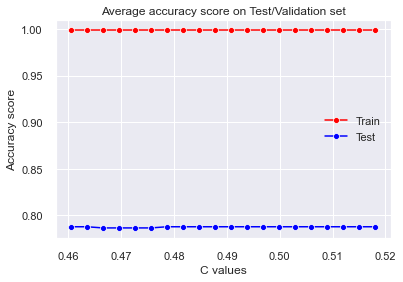

In [109]:
plt.xlabel('C values');
plt.ylabel('Accuracy score');
# plt.ylim([0.0, 1]);

# TODO
# p 
sns.lineplot(x = np.log(C_range), y = aver_train_scoreC, label = "Train", color = "red", marker='o')
sns.lineplot(x = np.log(C_range), y = aver_test_scoreC, label = "Test", color = "blue", marker='o')

# show a legend on the plot 
plt.legend() 
plt.title('Average accuracy score on Test/Validation set')
plt.show()

# print("Best C-value for LR: %.3f" % best_C) 
# print("Test set log-loss at best C-value: %.4f" % min_loss)

## Log loss

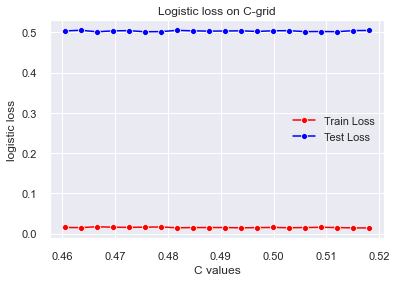

Best C-value for LR: 1.595
Test set log-loss at best C-value: 0.5011


In [104]:
plt.xlabel('C values');
plt.ylabel('logistic loss');
# plt.ylim([0.0, 1]);

# TODO
# p 
sns.lineplot(x = np.log(C_range), y = aver_train_lossC, label = "Train Loss", color = "red", marker='o')
sns.lineplot(x = np.log(C_range), y = aver_test_lossC, label = "Test Loss", color = "blue", marker='o')

# show a legend on the plot 
plt.legend() 
plt.title('Logistic loss on C-grid')
plt.show()

print("Best C-value for LR: %.3f" % best_C) 
print("Test set log-loss at best C-value: %.4f" % min_loss)

#### with d

In [ ]:
C_range = np.logspace(-1, 10, 5)
gamma_range = np.logspace(-9, 3, 5)
d_range = [2,3,5,8,10]
model_list2 = []
aver_train_score2 = []
aver_test_score2 = []
aver_train_loss2 = []
aver_test_loss2 = []


for C in C_range:
    for g in gamma_range:
        for d in d_range:
            k = 3
            kfold = KFold(n_splits=k)

            train_scores = []
            test_scores = []
            train_loss = []
            test_loss = []

            model = SVC(kernel='rbf', C=C, gamma=g,degree=d)
            for train_idx, test_idx in kfold.split(X):
                X_train, X_test = X[train_idx,:], X[test_idx,:]
                y_train, y_test = y[train_idx], y[test_idx]

                model.fit(X_train, y_train)
                pred_train = model.predict(X_train)
                pred_test = model.predict(X_test)

                # Score
                score_train = model.score(X_train, y_train)
                score_test = model.score(X_test, y_test)
        #         print("Train score: ", score_train)
        #         print("Test score: ", score_test)
                train_scores.append(score_train)
                test_scores.append(score_test)

                # Log loss
                log_loss_train = sklearn.metrics.log_loss(y_train,pred_train)
                log_loss_test = sklearn.metrics.log_loss(y_test,pred_test)
        #         print("Train loss: ", log_loss_train)
        #         print("Test loss: ", log_loss_test)
                train_loss.append(log_loss_train)
                test_loss.append(log_loss_test)


#             print("\nFor C value : ", C)
#             print("\nFor gamma value : ", g)
#             print("\nFor degree : ", d)
            
#             print("\nAverage train accuracy: ", np.average(score_train))
#             print("Average test accuracy: ", np.average(score_test))
#             print("\nAverage train loss: ", np.average(train_loss))
#             print("Average test loss: ", np.average(test_loss))

            print('----\n')

            model_list2.append(model)
            aver_train_score2.append(np.average(score_train))
            aver_test_score2.append(np.average(score_test))
            aver_train_loss2.append(np.average(train_loss))
            aver_test_loss2.append(np.average(test_loss))

#### Best Log loss

In [ ]:
min_loss = min(aver_test_loss)
index_N2 = aver_test_loss.index(min_loss)
# best_C =  C_grid[index_N2]
best_model = model_list[index_N2]

#### stability across Kfolds

In [107]:
print("-----------------\nClassify with base data, 5 folds\n-----------------")

K = [2,3,4,5,8,10]
K_train_loss = []
K_test_loss = []
for k in K:
    kfold = KFold(n_splits=k)
    train_scores = []
    test_scores = []
    train_loss = []
    test_loss = []
    
    for train_idx, test_idx in kfold.split(X):
        shuffler = np.random.permutation(len(X))
        X_shuffled = X[shuffler]
        y_shuffled = y[shuffler]
        X_train, X_test = X_shuffled[train_idx,:], X_shuffled[test_idx,:]
        y_train, y_test = y_shuffled[train_idx], y_shuffled[test_idx]

        model.fit(X_train, y_train)
        pred_train = best_model.predict_proba(X_train)
        pred_test = best_model.predict_proba(X_test)

        score_train = best_model.score(X_train, y_train)
        score_test = best_model.score(X_test, y_test)
        train_scores.append(score_train)
        test_scores.append(score_test)
        
        log_loss_train = sklearn.metrics.log_loss(y_train,pred_train)
        log_loss_test = sklearn.metrics.log_loss(y_test,pred_test)
        
        train_loss.append(log_loss_train)
        test_loss.append(log_loss_test)

    print("\nAverage train accuracy: ", np.average(score_train))
    print("Average test accuracy: ", np.average(score_test))
    print("Average train loss: ", np.average(train_loss))
    print("Average test loss: ", np.average(test_loss))
    
    K_train_loss.append(np.average(train_loss))
    K_test_loss.append(np.average(test_loss))

-----------------
Classify with base data, 5 folds
-----------------

Average train accuracy:  0.9291666666666667
Average test accuracy:  0.9266666666666666
Average train loss:  0.1735694664310775
Average test loss:  0.16055638497616537

Average train accuracy:  0.928125
Average test accuracy:  0.9275
Average train loss:  0.17242154725131023
Average test loss:  0.15634568260824375

Average train accuracy:  0.9266666666666666
Average test accuracy:  0.9316666666666666
Average train loss:  0.16854908920701198
Average test loss:  0.1626044351934498

Average train accuracy:  0.928125
Average test accuracy:  0.9270833333333334
Average train loss:  0.16686237469702206
Average test loss:  0.16786512973001894

Average train accuracy:  0.929047619047619
Average test accuracy:  0.92
Average train loss:  0.16648540537295214
Average test loss:  0.17110556801830645

Average train accuracy:  0.925
Average test accuracy:  0.9541666666666667
Average train loss:  0.1659686941513512
Average test loss:  

In [ ]:
plt.xlabel('K from 2 to 12');
plt.ylabel('logistic loss');

sns.lineplot(x = K, y = K_train_loss, label = "Train Loss", color = "red", marker='o')
sns.lineplot(x = K, y = K_test_loss, label = "Test Loss", color = "blue", marker='o')

# show a legend on the plot 
plt.legend() 
plt.title('Log loss across K values')
plt.show()


print('standard deviation for training set: %.3f  ' %np.std(K_train_loss))
print('standard deviation for testing set: %.3f  ' %np.std(K_test_loss))

In [ ]:
plt.xlabel('d, g pairs');
plt.ylabel('logistic loss');
plt.ylim([0.0, 1]);

# TODO
# p 
sns.lineplot(x = p, y = aver_train_loss, label = "Train Loss", color = "red", marker='o')
sns.lineplot(x = p, y = aver_test_loss,label = "Test Loss", color = "blue", marker='o')

# show a legend on the plot 
plt.legend() 
plt.title('Logistic loss on C-grid')
plt.show()

print("Best C-value for LR: %.3f" % best_C) 
print("Test set log-loss at best C-value: %.4f" % min_loss)

#### Result

In [105]:

yproba1_test = best_model.predict_proba(x_te)[:,1]
np.savetxt('yproba1_test.txt', yproba1_test)

In [106]:
x_te.shape
yproba1_test.shape

(600,)

In [108]:
best_C

1.5945259037974173

In [110]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
parameters = {}

model = SVC(kernel='rbf', C=1.5945259037974173, probability=True)

clf = GridSearchCV(model, parameters,cv=3)
clf.fit(X,y)
clf.cv_results_

{'mean_fit_time': array([23.93563898]),
 'std_fit_time': array([1.08633562]),
 'mean_score_time': array([3.02093093]),
 'std_score_time': array([0.07718914]),
 'params': [{}],
 'split0_test_score': array([0.79125]),
 'split1_test_score': array([0.72125]),
 'split2_test_score': array([0.78625]),
 'mean_test_score': array([0.76625]),
 'std_test_score': array([0.03188521]),
 'rank_test_score': array([1], dtype=int32)}